In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
fin=pd.read_excel("Total Net Revenue.xlsx")

In [3]:
fin.head()

,Year,TotalNetRevenue,InvestmentBanking Fees,PrincipalTransactions,LendingsandDeposits,AssetManagement,Mortgage fees,Cardincome,Otherincome,TotalInterestIncome
0,2008,67252,5526,10699,5088,13943,3467,7419,2169,43500
1,2009,100434,7087,9796,7045,12540,3678,7110,916,52352
2,2010,102694,6190,10894,6340,13499,3870,5891,2044,61196
3,2011,97234,5911,10005,6458,14094,2721,6158,2605,47689
4,2012,97031,5808,5536,6196,13668,8687,5658,4258,44910


In [4]:
fin.isnull().sum()

Year                      0
TotalNetRevenue           0
InvestmentBanking Fees    0
PrincipalTransactions     0
LendingsandDeposits       0
AssetManagement           0
Mortgage fees             0
Cardincome                0
Otherincome               0
TotalInterestIncome       0
dtype: int64

In [5]:
correlate=fin.corr()
correlate= (correlate)
correlate

,Year,TotalNetRevenue,InvestmentBanking Fees,PrincipalTransactions,LendingsandDeposits,AssetManagement,Mortgage fees,Cardincome,Otherincome,TotalInterestIncome
Year,1.000000,0.632645,0.740217,0.532728,-0.072004,0.893764,-0.474580,-0.845199,0.840699,0.172789
TotalNetRevenue,0.632645,1.000000,0.721652,0.321093,0.677155,0.439103,-0.212189,-0.604559,0.515517,0.656201
InvestmentBanking Fees,0.740217,0.721652,1.000000,0.597604,0.336657,0.654732,-0.604175,-0.530640,0.432803,0.474061
PrincipalTransactions,0.532728,0.321093,0.597604,1.000000,-0.087869,0.612125,-0.867798,-0.285362,0.298724,0.457909
LendingsandDeposits,-0.072004,0.677155,0.336657,-0.087869,1.000000,-0.278061,0.089661,0.012127,-0.148399,0.559422
AssetManagement,0.893764,0.439103,0.654732,0.612125,-0.278061,1.000000,-0.538770,-0.634418,0.795825,0.105138
Mortgage fees,-0.474580,-0.212189,-0.604175,-0.867798,0.089661,-0.538770,1.000000,0.294956,-0.113419,-0.325692
Cardincome,-0.845199,-0.604559,-0.530640,-0.285362,0.012127,-0.634418,0.294956,1.000000,-0.701097,-0.235521
Otherincome,0.840699,0.515517,0.432803,0.298724,-0.148399,0.795825,-0.113419,-0.701097,1.000000,0.120748
TotalInterestIncome,0.172789,0.656201,0.474061,0.457909,0.559422,0.105138,-0.325692,-0.235521,0.120748,1.000000


In [6]:
!pip install seaborn
import seaborn as sns

<AxesSubplot:>

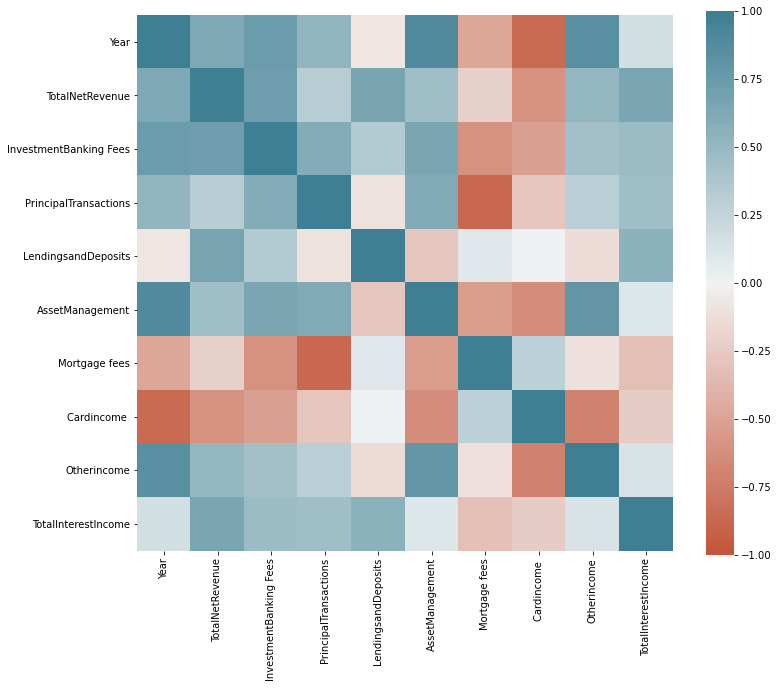

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(
    correlate, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True

)

In [8]:
x=fin.iloc[:,2:10]

In [9]:
y=fin.TotalNetRevenue

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.3)

In [11]:
regr = linear_model.LinearRegression()
regr.fit(x,y)

LinearRegression()

In [12]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -65824.30979917997
Coefficients: 
 [-0.27469726  1.18395337 17.53693085  3.72031758  1.62578869 -4.3502119
 -0.21535239  0.22926812]


In [13]:
print('slope',regr.coef_)

slope [-0.27469726  1.18395337 17.53693085  3.72031758  1.62578869 -4.3502119
 -0.21535239  0.22926812]


In [14]:
import statsmodels.api as sm
X = sm.add_constant(x)

In [15]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

In [16]:
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:        TotalNetRevenue   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              772.5
Date:                Sat, 02 Oct 2021   Prob (F-statistic):                    4.18e-06
Time:                        02:03:35   Log-Likelihood:                         -110.90
No. Observations:                  12   AIC:                                      237.8
Df Residuals:                       4   BIC:                                      241.7
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

C:\Users\Rushabh Shah\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [17]:
x=fin.iloc[:,3:10]

In [18]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

In [19]:
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:        TotalNetRevenue   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              1087.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):                    1.20e-07
Time:                        02:03:35   Log-Likelihood:                         -111.00
No. Observations:                  12   AIC:                                      236.0
Df Residuals:                       5   BIC:                                      239.4
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

C:\Users\Rushabh Shah\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [20]:
# Checking for the VIF values of the variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,AssetManagement,306.81
1,LendingsandDeposits,265.68
0,PrincipalTransactions,232.26
6,TotalInterestIncome,187.32
4,Cardincome,123.51
5,Otherincome,38.77
3,Mortgage fees,22.72


In [22]:
X=x.drop("AssetManagement",axis=1)
X

,PrincipalTransactions,LendingsandDeposits,Mortgage fees,Cardincome,Otherincome,TotalInterestIncome
0,10699,5088,3467,7419,2169,43500
1,9796,7045,3678,7110,916,52352
2,10894,6340,3870,5891,2044,61196
3,10005,6458,2721,6158,2605,47689
4,5536,6196,8687,5658,4258,44910
5,10141,5945,5205,6022,3847,43319
6,10531,5801,3563,6020,3013,43634
7,10408,5694,2513,5924,3032,43068
8,11566,5774,2491,4779,3795,46083
9,11347,5933,1616,4433,3646,50097


In [23]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [24]:
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:        TotalNetRevenue   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              1368.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):                    3.89e-09
Time:                        02:03:35   Log-Likelihood:                         -111.63
No. Observations:                  12   AIC:                                      235.3
Df Residuals:                       6   BIC:                                      238.2
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

C:\Users\Rushabh Shah\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [25]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,LendingsandDeposits,209.86
0,PrincipalTransactions,190.93
5,TotalInterestIncome,173.24
3,Cardincome,111.57
2,Mortgage fees,22.71
4,Otherincome,20.62


In [26]:
X1=X.drop("PrincipalTransactions",axis=1)
X1

,LendingsandDeposits,Mortgage fees,Cardincome,Otherincome,TotalInterestIncome
0,5088,3467,7419,2169,43500
1,7045,3678,7110,916,52352
2,6340,3870,5891,2044,61196
3,6458,2721,6158,2605,47689
4,6196,8687,5658,4258,44910
5,5945,5205,6022,3847,43319
6,5801,3563,6020,3013,43634
7,5694,2513,5924,3032,43068
8,5774,2491,4779,3795,46083
9,5933,1616,4433,3646,50097


In [27]:
model = sm.OLS(y, X1).fit()
predictions = model.predict(X1)
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:        TotalNetRevenue   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              1724.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):                    1.18e-10
Time:                        02:03:35   Log-Likelihood:                         -112.26
No. Observations:                  12   AIC:                                      234.5
Df Residuals:                       7   BIC:                                      236.9
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

C:\Users\Rushabh Shah\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [28]:
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,LendingsandDeposits,209.80
4,TotalInterestIncome,134.86
2,Cardincome,52.24
3,Otherincome,9.09
1,Mortgage fees,5.74


In [30]:
model = sm.OLS(y, X1).fit()
predictions = model.predict(X1)
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:        TotalNetRevenue   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              1724.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):                    1.18e-10
Time:                        02:06:33   Log-Likelihood:                         -112.26
No. Observations:                  12   AIC:                                      234.5
Df Residuals:                       7   BIC:                                      236.9
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

C:\Users\Rushabh Shah\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [32]:
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,LendingsandDeposits,209.80
4,TotalInterestIncome,134.86
2,Cardincome,52.24
3,Otherincome,9.09
1,Mortgage fees,5.74


In [33]:
X3=X1.drop("Mortgage fees",axis=1)
X3

,LendingsandDeposits,Cardincome,Otherincome,TotalInterestIncome
0,5088,7419,2169,43500
1,7045,7110,916,52352
2,6340,5891,2044,61196
3,6458,6158,2605,47689
4,6196,5658,4258,44910
5,5945,6022,3847,43319
6,5801,6020,3013,43634
7,5694,5924,3032,43068
8,5774,4779,3795,46083
9,5933,4433,3646,50097


In [34]:
model = sm.OLS(y, X3).fit()
predictions = model.predict(X3)
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:        TotalNetRevenue   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              2192.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):                    3.45e-12
Time:                        02:07:19   Log-Likelihood:                         -112.96
No. Observations:                  12   AIC:                                      233.9
Df Residuals:                       8   BIC:                                      235.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

C:\Users\Rushabh Shah\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [35]:
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,LendingsandDeposits,186.16
3,TotalInterestIncome,109.69
1,Cardincome,48.86
2,Otherincome,8.89


In [36]:
X4=X3.drop("TotalInterestIncome",axis=1)
X4

,LendingsandDeposits,Cardincome,Otherincome
0,5088,7419,2169
1,7045,7110,916
2,6340,5891,2044
3,6458,6158,2605
4,6196,5658,4258
5,5945,6022,3847
6,5801,6020,3013
7,5694,5924,3032
8,5774,4779,3795
9,5933,4433,3646


In [37]:
model = sm.OLS(y, X4).fit()
predictions = model.predict(X4)
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:        TotalNetRevenue   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              2517.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):                    1.79e-13
Time:                        02:08:05   Log-Likelihood:                         -114.56
No. Observations:                  12   AIC:                                      235.1
Df Residuals:                       9   BIC:                                      236.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

C:\Users\Rushabh Shah\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
